## k-Nearest Neighbors (kNN)

A simple supervised learning algorithm is [k-Nearest Neighbors](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm) algorithm (k-NN). KNN is a non-parametric method used for classification and regression.

In both cases, the input consists of the k closest training examples in the feature space. The output depends on whether k-NN is used for classification or regression:

In k-NN classification, the output is a class membership. An object is classified by a majority vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor.  

![k-nearest neighbor voting](http://nikbearbrown.com/YouTube/MachineLearning/M07/k-Nearest_Neighbors.png)  

*k-nearest neighbor voting*

In k-NN regression, the output is the property value for the object. This value is the average of the values of its k nearest neighbors.

k-NN has the nice property that a labled subset of a data set could be used to label the whole data set. This is especially important in the analysis of “big-data.” Most big-data sets are only partially labled, as labeling often librarys human annotation. While many are looking to unsupervised learning the ‘future’ of big-data, k-Nearest Neighbors is an instance of a supervised learning algorithm that can be used with big-data.


The kNN classification problem is to find the k nearest data points in a data set to a given query data point. The point is then assigned to the group by a majority "vote." For this reason, pick an odd k is prefered as the odd vote can break ties. This operation is also known as a kNN join, and can be defined as: given two data sets $R$ and $S$, find the k nearest Neighbor from $S$ for every object in $R$. $S$ refers to data that has already been classified, the training set. $R$ refers to data that is needs to be classified.

The kNN algorithm can be fairly expensive, especially if one chooses a large k, as the k-nearest neighbors in $S$ for every point in $R$ needs to be calculated.   

### Nearest neighbor search

A simple solution to finding nearest neighbors is to compute the distance from the each point in $S$ to every point in $R$ and keeping track of the "best so far". This algorithm, sometimes referred to as the naive approach, has a running time of O(|R||S|).

One can speed up the search to retrieve a "good guess" of the nearest neighbor. This is often done be limiting the search to a preset radius around a point culling out most of the points in $S$.  If k neighbors aren't not found in the radius then the bound can be iteratively expanded until k are found.  Altnernatively, the vote could be made using fewer points when k points aren't found within a radius r. 

### k-Nearest Neighbors is nonparametric "lazy learning "

K-Nearest Neighbors algorithm (kNN) is a nonparametric method for classifying objects based on the closest training examples in the feature space. kNN is nonparametric becuase it d oes not involve any estimation of parameters. This is sometimes called "lazy learning" or instance-based learning, as the mapping is approximated locally and all computation is deferred until classification. 


## kNN Classification and Distance Metrics


Neighbors are defined by a distance or dissimilarity measure. In essence, the only thing that kNN librarys is some measure of "closeness" of the points in $S$ and $R$. Any distance metric or dissimilarity measure can be used. The most common being the Euclidean distance between the points $x = (x_1, x_2,..., x_n)$ and $y = (y_1, y_2,..., y_n)$ is  given by the pythagorean formula:  

$$
\begin{align}\mathrm{d}(\mathbf{p},\mathbf{q}) = \mathrm{d}(\mathbf{q},\mathbf{p}) & = \sqrt{(q_1-p_1)^2 + (q_2-p_2)^2 + \cdots + (q_n-p_n)^2} \\[8pt]
& = \sqrt{\sum_{i=1}^n (q_i-p_i)^2}.\end{align}
$$


Any measure of "closeness",  distance or dissimilarity measure can be used. For example,

* [Chebyshev distance](https://en.wikipedia.org/wiki/Chebyshev_distance) - measures distance assuming only the most significant dimension is relevant.  
* [Hamming distance](https://en.wikipedia.org/wiki/Hamming_distance) - identifies the difference bit by bit of two strings  
* [Mahalanobis distance](https://en.wikipedia.org/wiki/Mahalanobis_distance) - normalizes based on a covariance matrix to make the distance metric scale-invariant.  
* [Manhattan distance](https://en.wikipedia.org/wiki/Taxicab_geometry) - measures distance following only axis-aligned directions.  
* [Minkowski distance](https://en.wikipedia.org/wiki/Minkowski_distance) - is a generalization that unifies Euclidean distance, Manhattan distance, and Chebyshev distance  

.. and many more.

## kNN Algorithm  


### Distance function

The distance function depends on your needs, but in general choosing features and distance metrics in which being "close" makes some sense in your domain are the distance metrics and features to choose.  The type of variable, categorical, ordinal or nominal should be considered when choosing a sensible measure of closeness.

### k nearest neighbors

Given an data point p, a training data set $S$, and an integer k, the k nearest neighbors of p from $S$, denoted as kNN(p, S), are a set of k objects from $S$ such that:


$$
∀o ∊ kNN(q, S), ∀s ∊{S – kNN(q, S)}, |o, p| ≤ |s, p|
$$




### kNN join  

Given two data sets R and S (where S is a training data set) and an integer k, the kNN join of R and S is defined as:

kNNjoin(R, S) = {(r, s)|∀r ∊ R, ∀s ∊ kNN(r, S)}

Basically, this combines each object r ∊ R with its k nearest neighbors from S.


## Steps in kNN Classification  


The kNN algorithm can be summarized in the following simple steps:

* Determine k (the selection of k depends on your data and project libraryments; there is no magic formula for k).  

* Calculate the distances between the new input and all the training data (as with k, the selection of a distance function also depends on the type of data).  

* Sort the distance and determine the k nearest neighbors based on the kth minimum distance.  

* Gather the categories of those neighbors.  

* Determine the category based on majority vote

In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import warnings
import random
from sklearn import cross_validation # used to test classifier
from sklearn.cross_validation import KFold, cross_val_score, train_test_split
from sklearn import metrics


from datetime import datetime
random.seed(datetime.now())
warnings.filterwarnings('ignore')

# Make plots larger
plt.rcParams['figure.figsize'] = (10, 6)
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import roc_curve # ROC Curves
from sklearn.metrics import auc # Calculating AUC for ROC's!
import warnings
warnings.filterwarnings('ignore')

/Users/bear/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Breast Cancer Wisconsin (Diagnostic) Data Set

In the project we'll be using the _Breast Cancer Wisconsin (Diagnostic) Data Set_ to predict whether the cancer is benign or malignant. 

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This data set is from the UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

This data set is also available through the UW CS ftp server: ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number 2) Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter) b) texture (standard deviation of gray-scale values) c) perimeter d) area e) smoothness (local variation in radius lengths) f) compactness (perimeter^2 / area - 1.0) g) concavity (severity of concave portions of the contour) h) concave points (number of concave portions of the contour) i) symmetry j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

In [2]:
field_names_df = pd.read_table('http://nikbearbrown.com/YouTube/MachineLearning/DATA/wpbc_data_field_names.txt',header=None)
field_names=field_names_df[0].tolist()
field_names

['ID',
 'diagnosis',
 'radius_mean',
 'radius_sd_error',
 'radius_worst',
 'texture_mean',
 'texture_sd_error',
 'texture_worst',
 'perimeter_mean',
 'perimeter_sd_error',
 'perimeter_worst',
 'area_mean',
 'area_sd_error',
 'area_worst',
 'smoothness_mean',
 'smoothness_sd_error',
 'smoothness_worst',
 'compactness_mean',
 'compactness_sd_error',
 'compactness_worst',
 'concavity_mean',
 'concavity_sd_error',
 'concavity_worst',
 'concave_points_mean',
 'concave_points_sd_error',
 'concave_points_worst',
 'symmetry_mean',
 'symmetry_sd_error',
 'symmetry_worst',
 'fractal_dimension_mean',
 'fractal_dimension_sd_error',
 'fractal_dimension_worst']

In [3]:
breast_cancer = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data',header=None,names = field_names)
breast_cancer.head()

,ID,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
#data formating ID is a non-informative column
breast_cancer = breast_cancer.drop("ID", 1)
breast_cancer.head()

,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
breast_cancer.groupby('diagnosis').count()

,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,area_mean,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
B,357,357,357,357,357,357,357,357,357,357,...,357,357,357,357,357,357,357,357,357,357
M,212,212,212,212,212,212,212,212,212,212,...,212,212,212,212,212,212,212,212,212,212


In [6]:
breast_cancer.describe()

,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,area_mean,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [7]:
breast_cancer.groupby('diagnosis').median()

,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,area_mean,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
B,12.200,17.39,78.18,458.4,0.09076,0.07529,0.03709,0.02344,0.1714,0.061540,...,13.35,22.820,86.92,547.4,0.12540,0.16980,0.1412,0.07431,0.2687,0.07712
M,17.325,21.46,114.20,932.0,0.10220,0.13235,0.15135,0.08628,0.1899,0.061575,...,20.59,28.945,138.00,1303.0,0.14345,0.35635,0.4049,0.18200,0.3103,0.08760


In [8]:
def scaled_df(df):
    scaled = pd.DataFrame()
    for item in df:
        if item in df.select_dtypes(include=[np.float]):
            scaled[item] = ((df[item] - df[item].min()) / 
            (df[item].max() - df[item].min()))
        else: 
            scaled[item] = df[item]
    return scaled
breast_cancer_scaled = scaled_df(breast_cancer)

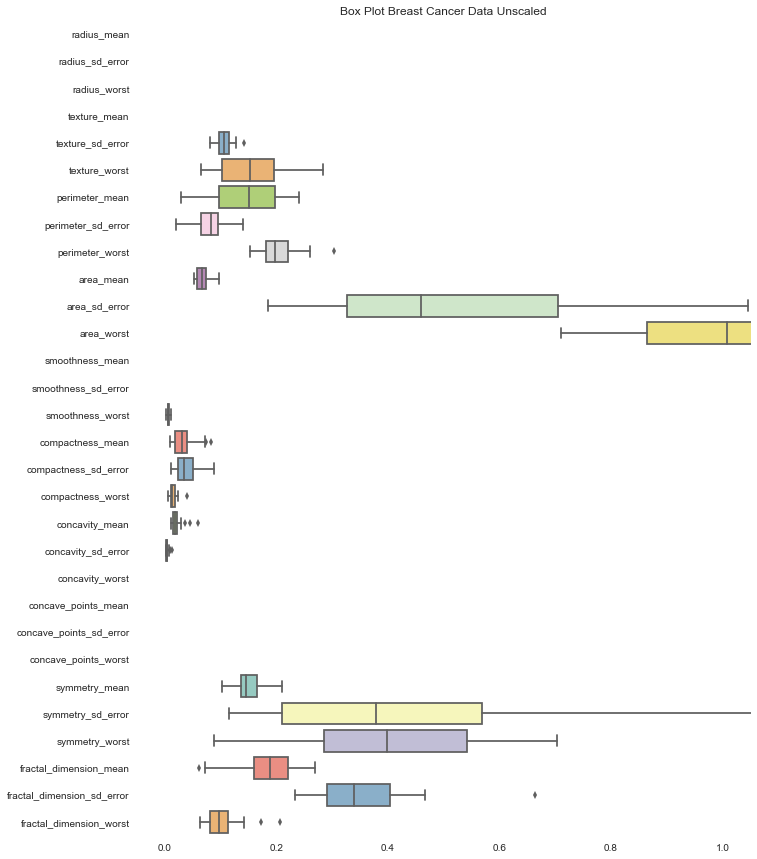

In [9]:
f, ax = plt.subplots(figsize=(11, 15))

ax.set_axis_bgcolor('#FFFFFF')
plt.title("Box Plot Breast Cancer Data Unscaled")
ax.set(xlim=(-.05, 1.05))
ax = sns.boxplot(data = breast_cancer[1:29], 
  orient = 'h', 
  palette = 'Set3')

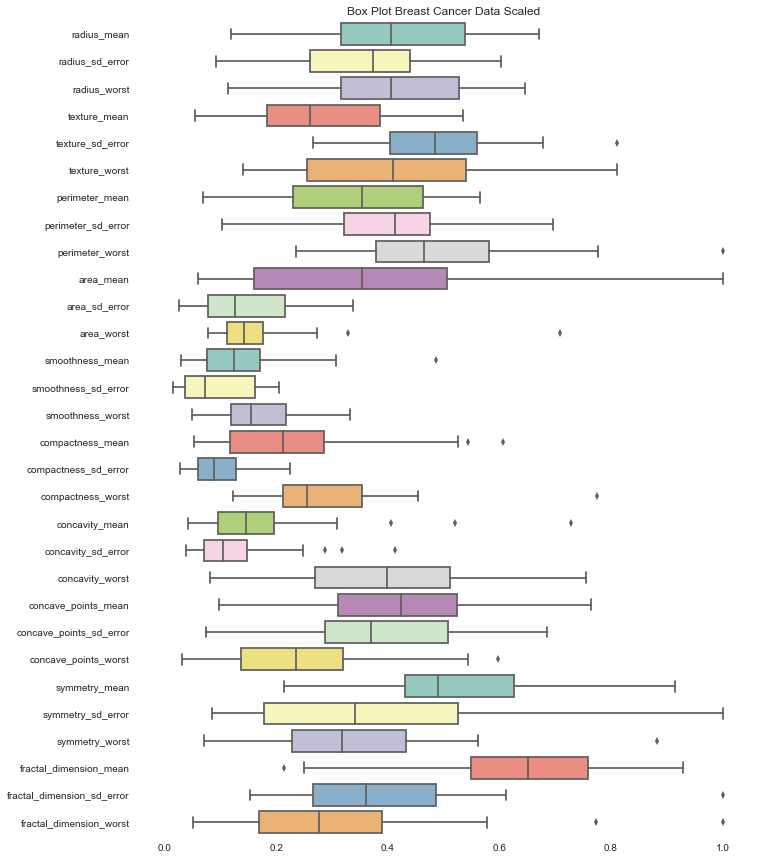

In [10]:
f, ax = plt.subplots(figsize=(11, 15))

ax.set_axis_bgcolor('#FFFFFF')
plt.title("Box Plot Breast Cancer Data Scaled")
ax.set(xlim=(-.05, 1.05))
ax = sns.boxplot(data = breast_cancer_scaled[1:29], 
  orient = 'h', 
  palette = 'Set3')

In [11]:
predictor_names=field_names_df[0].tolist()
predictor_names=predictor_names[2:]
predictor_names

['radius_mean',
 'radius_sd_error',
 'radius_worst',
 'texture_mean',
 'texture_sd_error',
 'texture_worst',
 'perimeter_mean',
 'perimeter_sd_error',
 'perimeter_worst',
 'area_mean',
 'area_sd_error',
 'area_worst',
 'smoothness_mean',
 'smoothness_sd_error',
 'smoothness_worst',
 'compactness_mean',
 'compactness_sd_error',
 'compactness_worst',
 'concavity_mean',
 'concavity_sd_error',
 'concavity_worst',
 'concave_points_mean',
 'concave_points_sd_error',
 'concave_points_worst',
 'symmetry_mean',
 'symmetry_sd_error',
 'symmetry_worst',
 'fractal_dimension_mean',
 'fractal_dimension_sd_error',
 'fractal_dimension_worst']

In [12]:
def rank_predictors(dat,l,f='diagnosis'):
    rank={}
    max_vals=dat.max()
    median_vals=dat.groupby(f).median()  # We are using the median as the mean is sensitive to outliers
    for p in l:
        score=np.abs((median_vals[p]['B']-median_vals[p]['M'])/max_vals[p])
        rank[p]=score
    return rank
cat_rank=rank_predictors(breast_cancer,predictor_names) 
cat_rank

{'area_mean': 0.00035919540229885377,
 'area_sd_error': 0.10083536373129133,
 'area_worst': 0.0011258955987717171,
 'compactness_mean': 0.090694239290989687,
 'compactness_sd_error': 0.047285353535353548,
 'compactness_worst': 0.097442697480583443,
 'concave_points_mean': 0.12363746467501009,
 'concave_points_sd_error': 0.203343949044586,
 'concave_points_worst': 0.17762106252938412,
 'concavity_mean': 0.017606079797340073,
 'concavity_sd_error': 0.031216487935656838,
 'concavity_worst': 0.20088790233074363,
 'fractal_dimension_mean': 0.37006872852233669,
 'fractal_dimension_sd_error': 0.062669478758662286,
 'fractal_dimension_worst': 0.050506024096385493,
 'perimeter_mean': 0.26771321462043107,
 'perimeter_sd_error': 0.31232604373757455,
 'perimeter_worst': 0.060855263157894794,
 'radius_mean': 0.18231945926716484,
 'radius_sd_error': 0.10361507128309573,
 'radius_worst': 0.19108753315649865,
 'smoothness_mean': 0.083189262966333027,
 'smoothness_sd_error': 0.071606418295831795,
 'smo

In [13]:
cat_rank=sorted(cat_rank.items(), key=lambda x: x[1])
cat_rank

[('area_mean', 0.00035919540229885377),
 ('area_worst', 0.0011258955987717171),
 ('smoothness_worst', 0.010295534853838727),
 ('concavity_mean', 0.017606079797340073),
 ('concavity_sd_error', 0.031216487935656838),
 ('compactness_sd_error', 0.047285353535353548),
 ('fractal_dimension_worst', 0.050506024096385493),
 ('perimeter_worst', 0.060855263157894794),
 ('fractal_dimension_sd_error', 0.062669478758662286),
 ('texture_sd_error', 0.070012239902080733),
 ('smoothness_sd_error', 0.071606418295831795),
 ('symmetry_mean', 0.081087151841868751),
 ('smoothness_mean', 0.083189262966333027),
 ('compactness_mean', 0.090694239290989687),
 ('compactness_worst', 0.097442697480583443),
 ('area_sd_error', 0.10083536373129133),
 ('radius_sd_error', 0.10361507128309573),
 ('concave_points_mean', 0.12363746467501009),
 ('texture_worst', 0.16519976838448178),
 ('symmetry_sd_error', 0.17632325141776936),
 ('concave_points_worst', 0.17762106252938412),
 ('radius_mean', 0.18231945926716484),
 ('texture_

In [14]:
# Take the top predictors based on median difference
ranked_predictors=[]
for f in cat_rank[18:]:
    ranked_predictors.append(f[0])
ranked_predictors

['texture_worst',
 'symmetry_sd_error',
 'concave_points_worst',
 'radius_mean',
 'texture_mean',
 'radius_worst',
 'concavity_worst',
 'concave_points_sd_error',
 'symmetry_worst',
 'perimeter_mean',
 'perimeter_sd_error',
 'fractal_dimension_mean']

In [15]:
X = breast_cancer_scaled[predictor_names]
#setting target
y = breast_cancer_scaled["diagnosis"]

In [16]:
#dividing data to have a training and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .4, random_state=0)


In [17]:
knn_k = []
for i in range(0,33):  # try up to k=33
    if (i % 2 != 0): # Use only odd k 
        knn_k.append(i)

cross_vals = []
for k in knn_k:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn,
                             X_train, 
                             y_train, 
                             cv = 10, 
                             scoring='accuracy')
    cross_vals.append(scores.mean())

MSE = [1 - x for x in cross_vals]
optimal_k = knn_k[MSE.index(min(MSE))]
print("Optimal K is {0}".format(optimal_k))

Optimal K is 11


In [18]:
# setting kNN classifier
knn = KNeighborsClassifier(n_neighbors=23)

# kNN cross validation
Kfold = KFold(len(ranked_predictors), n_folds=5, shuffle=False)
print("KfoldCrossVal mean score using kNN is %s" %cross_val_score(knn,X,y,cv=10).mean())

# kNN metrics
kNNm = knn.fit(X_train, y_train)

y_pred = kNNm.predict(X_test)
print("Accuracy score using kNN is %s" %metrics.accuracy_score(y_test, y_pred))


KfoldCrossVal mean score using kNN is 0.961459683692
Accuracy score using kNN is 0.934210526316
